## Search with Options

- Piece or Corpus
- Actual or Incremental Durations
- Chromatic or Diatonic
- Exact or Close
- Classify

***


In [4]:
from crim_intervals import *
import pandas as pd
import ast
import matplotlib
from itertools import tee, combinations
import numpy as np
from fractions import Fraction


### Short Corpus

In [25]:
# work_list = ['CRIM_Mass_0002_1.mei',
#  'CRIM_Mass_0002_2.mei',
#  'CRIM_Mass_0002_3.mei',
#  'CRIM_Mass_0002_4.mei',
#  'CRIM_Mass_0002_5.mei',
# 'CRIM_Model_0001.mei']
# git = 'https://raw.githubusercontent.com/RichardFreedman/CRIM-notebooks/master/CRIM/MEI/'
# work_list = [git + 'Sermisy_Tant_msg.mei']
work_list = ['https://raw.githubusercontent.com/RichardFreedman/CRIM-notebooks/master/CRIM/MEI/Sermisy_Tant_msg.mei']

corpus = CorpusBase(work_list)
for s in corpus.scores:
    print(s.metadata.title)

Requesting file from https://raw.githubusercontent.com/RichardFreedman/CRIM-notebooks/master/CRIM/MEI/Sermisy_Tant_msg.mei...
Import from https://raw.githubusercontent.com/RichardFreedman/CRIM-notebooks/master/CRIM/MEI/Sermisy_Tant_msg.mei failed, please check your url. File paths must begin with a '/'. Continuing to next file...


Exception: At least one score must be succesfully imported

## Load File and Correct the MEI Metadata

In [130]:
# work_list = [el.replace("CRIM_", "https://crimproject.org/mei/MEI_4.0/CRIM_") for el in work_list]
# corpus = CorpusBase(work_list)

# import xml.etree.ElementTree as ET
# import requests

# MEINSURI = 'http://www.music-encoding.org/ns/mei'
# MEINS = '{%s}' % MEINSURI

# for i, path in enumerate(work_list):
    
#     try:
#         if path[0] == '/':
#             mei_doc = ET.parse(path)
#         else:
#             mei_doc = ET.fromstring(requests.get(path).text)

#       # Find the title from the MEI file and update the Music21 Score metadata
#         title = mei_doc.find('mei:meiHead//mei:titleStmt/mei:title', namespaces={"mei": MEINSURI}).text
#         print(path, title)
#         corpus.scores[i].metadata.title = title
#     except:
#         continue

# for s in corpus.scores:
#     print(s.metadata.title)


## Select Actual or Incremental Durations

#### About Rhythmic Durations

- For `find_close_matches` and `find_exact_matches`, rhythmic variation/duration is displayed, but **not** factored into the calculation of matching.
- **Incremental Offset** calculates the intervals using a **fixed offset between notes**, no matter their actual duration.  Use this to ignore passing tones or other ornaments.  The offsets are expressed in multiples of the quarter note (Offset = 1 samples at quarter note; Offset = 2 at half note, etc). Set with `vectors = IntervalBase(corpus.note_list_incremental_offset(2))`

In [131]:
vectors = IntervalBase(corpus.note_list)
#vectors = IntervalBase(corpus.note_list_incremental_offset(2))

***

## Select Generic or Semitone Scale:

- **Length of the Soggetto**: `into_patterns([vectors.semitone_intervals], 5)` 

- The **number** in this command represents the **minimum number of vectors to find**. 5 vectors is 6 notes.


In [132]:
patterns = into_patterns([vectors.generic_intervals], 5)
#patterns = into_patterns([vectors.semitone_intervals], 4)

***

## Select Exact Matches Here, or Close Below
#### (Use comment feature to select screen preview or CSV output) 

- **Exact** is exact in *all* ways `find_exact_matches(patterns, 2)` 
- The **number** in this command represents the **minimum number of matching melodies needed before reporting**. This allows us to filter for common or uncommon soggetti.

In [77]:
exact_matches = find_exact_matches(patterns, 2)
output_exact = export_pandas(exact_matches)
pd.DataFrame(output_exact).head()
pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(output_exact)
# output_exact.head(50)
# df = output_exact
# output_exact["pattern_generating_match"] = output_exact["pattern_generating_match"].apply(tuple)

# results = pd.DataFrame(output_exact)
# results["pattern_generating_match"] = results["pattern_generating_match"].apply(tuple)
# results.head(10)
# export_to_csv(exact_matches)
# file_name = "work_list"+"exact_5.csv"
# output_exact.to_csv("Riquet_Kyrie.csv")

Finding exact matches...
72 melodic intervals had more than 2 exact matches.



In [133]:
df = output_exact
pd.set_option("display.max_rows", None, "display.max_columns", None)
df["note_durations"] = df["note_durations"].map(lambda x: pd.eval(x))
df["start_offset"] = df["start_offset"].map(lambda x: pd.eval(x))
df["end_offset"] = df["end_offset"].map(lambda x: pd.eval(x))
df["pattern_generating_match"] = df["pattern_generating_match"].apply(tuple)
df["pattern_matched"] = df["pattern_matched"].apply(tuple)
df["sum_durs"] = df.note_durations.apply(sum)
df = df.round(2)
# df.to_csv("Gombert.csv")


***

### Select Close Matches Here
#### (Comment out the 'for item iteration' in order to skip screen preview)

- **Close** matches allow for melodic variation (see more below). `find_close_matches(patterns, 2, 1)`
- The **first number** in this command is the **minimum number of melodies** needed before reporting
- The **second number** is **threshold of similarity** needed in order to find a match. 
- Lower number = very similar; higher number = less similar

##### More about Close Matches  
- The **threshold for close matches** is determined by the **second number** called in the method. 
- We select two patterns, then compare *each vector in each pattern successively*. 
- The *differences between each vector are summed*. 
- If that value is **below the threshold specified**, we consider the **two patterns closely matched**.
- The format of the method call is  `find_close_matches(the array you get from into_patterns, minimum matches needed to be displayed, threshold for close match)`.

In [211]:
close_matches = find_close_matches(patterns, 4, 1)
#for item in close_matches:
   #item.print_close_matches()
    #return pd.DataFrame(close_matches)

output_close = export_pandas(close_matches)
output_close["pattern_generating_match"] = output_close["pattern_generating_match"].apply(tuple)

results = pd.DataFrame(output_close)
results["pattern_generating_match"] = results["pattern_generating_match"].apply(tuple)
results.head()

results.to_csv("Model_0001_Close_3_1")
# export_to_csv(close_matches)

Finding close matches...
201 melodic intervals had more than 4 exact or close matches.



***

## Classify Patterns Here 
#### Note:  depends on choice of Close or Exact above!  Must choose appropriate one below!
#### Enable "export_to_csv" line to allow this within Notebook (must answer "Y" and provide filename)

#### note that the classifier can only find patterns with AT LEAST THREE entries!  2-voice fugas are invisible at the moment.  Could be added!

In [134]:
# THIS IS DEV COPY for use with CLOSE/EXACT Matches

import numpy as np

# Converts lists to tuples

def lists_to_tuples(el):
    if isinstance(el, list):
        return tuple(el)
    else:
        return el

# Filters for the length of the Presentation Type in the Classifier

def limit_offset_size(array, limit):
    under_limit = np.cumsum(array) <= limit
    return array[: sum(under_limit)]

# Gets the the list of offset differences for each group 

def get_offset_difference_list(group):
    # if we do sort values as part of the func call, then we don't need this first line
    group = group.sort_values("start_offset")
    group["next_offset"] = group.start_offset.shift(-1)
    offset_difference_list = (group.next_offset - group.start_offset).dropna().tolist()
    return offset_difference_list

# The classifications are done here
# be sure to have the offset difference limit set here and matched in gap check below  80 = ten bars

def classify_offsets(offset_difference_list):
    """
    Put logic for classifying an offset list here
    """
    # 
    offset_difference_list = limit_offset_size(offset_difference_list, 500)
    
    alt_list = offset_difference_list[::2]
    
    if len(set(offset_difference_list)) == 1 and len(offset_difference_list) > 1:
        return ("PEN", offset_difference_list)
    # elif (len(offset_difference_list) %2 != 0) and (len(set(alt_list)) == 1):
    elif (len(offset_difference_list) %2 != 0) and (len(set(alt_list)) == 1) and (len(offset_difference_list) >= 3):
        return ("ID", offset_difference_list)
    elif len(offset_difference_list) >= 1:
        return ("Fuga", offset_difference_list)
    else: 
        return ("Singleton", offset_difference_list)
    
# adds predicted type, offsets and entry numbers to the results

def predict_type(group):
    offset_differences = get_offset_difference_list_a(group)
    predicted_type, offsets = classify_offsets(offset_differences)

    group["predicted_type"] = [predicted_type for i in range(len(group))]
    group["offset_diffs"] = [offsets for i in range(len(group))]
    group["entry_number"] = [i + 1 for i in range(len(group))]

    return group

In [135]:
# lists for views.  These are used when calling the df below

simple_view = ["piece_title", "part", "pattern_generating_match", "pattern_matched", "start_offset"]

offset_details = ["start_measure", "start_beat", "end_offset", "note_durations", "prev_entry_off", "next_entry_off"]

drop_cols = ["pattern_matched", "part", "pattern_generating_match", "piece_title", "start_measure", "start_beat", "end_offset", "note_durations", "prev_entry_off", "next_entry_off"]

ready_classify = ["pattern_generating_match", "pattern_matched", "piece_title", "part", "start_measure", "start_beat", "start_offset", "sub_group_id", "is_first"]

In [146]:
# now process the original match data df by:
# sorting by start offset, then group by pattern generating match and applying the function above for prev entry
# also give each group a number
# sort by group number and start offset
# so that we can find PARALLEL (=0) Forward Gaps (the distance to NEXT entry), and Backward Gaps (distance to PREVIOUS Entry)
# All Proximate Matches are part of same sub Group (and go to classifier)
# Parallels are part of Sub Group but NOT part of Classified.  We will filter them OUT before classification
# Forward ONLY means the NEXT entry is a GAP.  No problem for Forward ONLY, since these are part of the previous set.
# Backward ONLY means the LAST entry was a GAP.  So these are NEW subgroups, since a new Presentation Type begins
# Forward AND Backward Gaps are SINGLETONS:  We will filter then OUT before Classification
# If an entry is the LAST in a Group and also has a BACKWARD gap it is also a SINGLETON

df2 = df

# Make Groups, Sort By Group and Offset, then and Add Previous/Next
df2["group_number"] = df2.groupby('pattern_matched').ngroup()
df2 = df2.sort_values(['group_number', 'start_offset'])
df2["prev_entry_off"] = df2["start_offset"].shift(1)
df2["next_entry_off"] = df2["start_offset"].shift(-1)


first_of_group = df2.drop_duplicates(subset=["pattern_matched"], keep='first').index
df2["is_first"] = df2.index.isin(first_of_group)
last_of_group = df2.drop_duplicates(subset=["pattern_matched"], keep='last').index
df2["is_last"] = df2.index.isin(last_of_group)

# Check Differences between Next and Last Offset

df2["last_off_diff"] = df2["start_offset"] - df2["prev_entry_off"]
df2["next_off_diff"] = df2["next_entry_off"] - df2["start_offset"]

# Find Parallel Entries 
df2["parallel"] = df2["last_off_diff"] == 0

# Set Gap Limits and Check Gaps Forward and Back
df2["forward_gapped"] = df2["next_off_diff"] >= 50
df2["back_gapped"] = df2["last_off_diff"] >= 50

# Find Singletons and Split Groups with Gaps
df2["singleton"] = ((df2['forward_gapped'] == True) & (df2['back_gapped'] == True) | (df2['back_gapped'] == True) & (df2["is_last"]))
df2["split_group"] = (df2['forward_gapped'] == False) & (df2['back_gapped'] == True)

#Mask Out Parallels and Singletons
df2 = df2[df2["parallel"] != True]
df2 = df2[df2["singleton"] != True]
df2["next_off_diff"] = df2["next_off_diff"].abs()
df2["last_off_diff"] = df2["last_off_diff"].abs()

# Find Final Groups
df2["combined_group"] = (df2.split_group | df2.is_first)
df2.loc[(df2["combined_group"]), "sub_group_id"] = range(df2.combined_group.sum())
df2["sub_group_id"] = df2["sub_group_id"].ffill()



<AxesSubplot:>

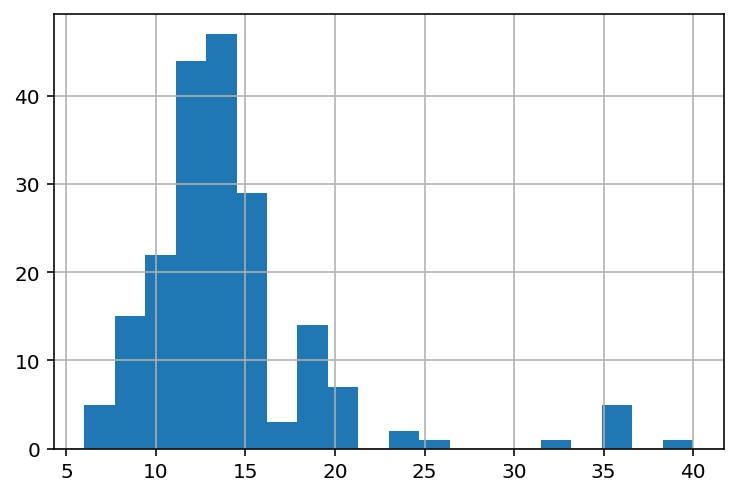

In [147]:
df2.sum_durs.hist(bins = 20)

In [148]:
# mask out short or long soggetti depending on information above

df2 = df2[df2["sum_durs"] >= 5]
# df2 = df2[df2["sum_durs"] <= 20]

In [168]:
# run the classifier on the newly curated list of groups

classified2 = df2.applymap(lists_to_tuples).groupby("sub_group_id").apply(predict_type)

# OPTIONAL:  drop the new singletons

classified2.drop(classified2[classified2['predicted_type'] == "Singleton"].index, inplace = True)

# OPTIONAL:  select only certain presentation types

# classified2 = classified2[classified2["predicted_type"] == "PEN"]

classified2["start"] = classified2["start_measure"].astype(str) +"/"+ classified2["start_beat"].astype(str) 
classified2.drop(columns=['start_measure', 'start_beat','offset_diffs'], inplace=True)

# put things back in order by offset and group them again
classified2.sort_values(by = ["start_offset"], inplace=True)
c3 = classified2.groupby(by = ["sub_group_id"])
c3 = c3.head()


# Now transform as Pivot Table


pivot_c3 = c3.pivot_table(index=["piece_title", "pattern_matched", "predicted_type", "sub_group_id"],
            columns="entry_number",
            values=["part", "start_offset", "start"],
            aggfunc=lambda x: x)
pivot_c3_sort = pivot_c3.sort_values(by = [("start_offset", 1)])
pivot_c3_sort = pivot_c3_sort.fillna("-")
pivot_c3_sort.reset_index(inplace=True)
pivot_c3_sort = pivot_c3_sort.drop(columns=['start_offset'])
# pivot_c3_sort.head(50)


/Users/rfreedma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<AxesSubplot:>

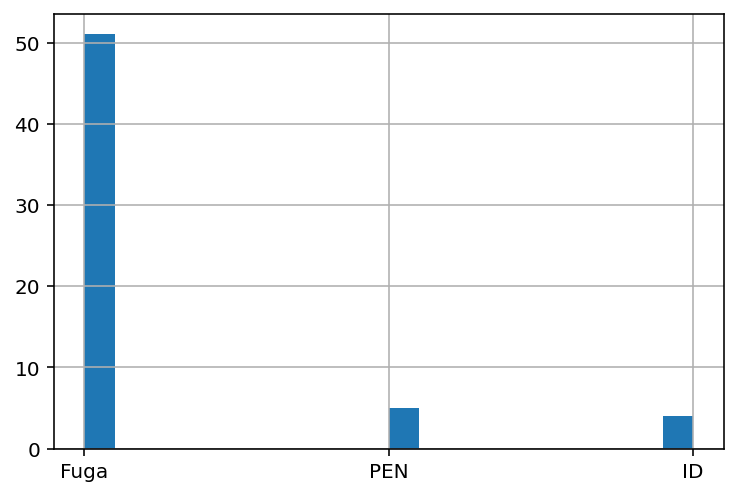

In [163]:

pivot_c3_sort.predicted_type.hist(bins = 20)
# pivot_c3.shape

<AxesSubplot:xlabel='start_offset', ylabel='predicted_type'>

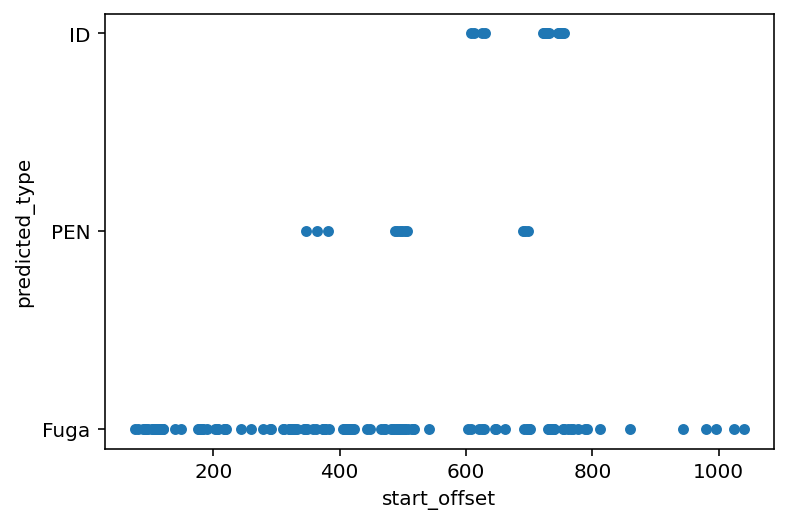

In [164]:
c3.plot.scatter(y="predicted_type", x="start_offset")

In [151]:

# Final output as CSV
pivot_c3_sort

# pivot_c3_sort.to_csv("Riquet-Glora.csv")



piece_title     pattern_matched predicted_type sub_group_id part  \
entry_number                                                                1   
0                   None    (-2, 2, 2, 2, 2)            PEN         35.0    A   
1                   None   (-3, 3, 2, 2, -2)            PEN          3.0    A   
2                   None   (3, 2, 2, -2, -2)            PEN         95.0    A   
3                   None  (-3, 2, -3, 2, -3)            PEN          1.0    A   
4                   None  (-3, 2, -3, 2, -2)            PEN          1.0    -   

                     start                  
entry_number  2  3       1       2       3  
0             A  S  44/2.0  46/3.0  48/4.0  
1             B  T  62/1.0  63/1.0  64/1.0  
2             B  T  62/2.0  63/2.0  64/2.0  
3             B  -  87/2.0  87/4.0       -  
4             -  S       -       -  88/2.0

# Durational Ratios

#### This Function Calculates the Ratios of the Durations in each Match

In [95]:
# makes pairs of ratio strings

def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def get_ratios(input_list):
    ratio_pairs = []
    for a, b in pairwise(input_list):
        ratio_pairs.append(b / a)
    return ratio_pairs


#### Now call the function to operate on the RESULTS file from earlier

In [141]:
# calculates 'duration ratios' for each soggetto, then adds this to the DF

results["duration_ratios"] = results.note_durations.apply(get_ratios)
short_results = results.drop(columns=["ema_url", "ema"])
short_results.head()

,pattern_generating_match,pattern_matched,piece_title,part,start_measure,start_beat,end_measure,end_beat,start_offset,end_offset,note_durations,duration_ratios
0,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,[Superius],1,1.0,4,1.0,0.0,24.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]","[2.0, 0.5, 1.0, 1.0, 2.0]"
1,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,[Superius],105,3.0,107,3.5,884.0,910.0,"[4.0, 8.0, 4.0, 4.0, 6.0, 2.0]","[2.0, 0.5, 1.0, 1.5, 0.3333333333333333]"
2,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,Altus,3,1.0,6,1.0,16.0,40.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]","[2.0, 0.5, 1.0, 1.0, 2.0]"
3,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,Tenor,5,1.0,8,1.0,32.0,56.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]","[2.0, 0.5, 1.0, 1.0, 2.0]"
4,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,Bassus,7,1.0,10,1.0,48.0,72.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]","[2.0, 0.5, 1.0, 1.0, 2.0]"


In [161]:
df_s = df[["piece_title", "pattern_generating_match", "part", "start_measure", "start_offset", "predicted_type"]]
df_s.head(20)

,piece_title,pattern_generating_match,part,start_measure,start_offset,predicted_type
0,Ave Maria,"(4, 1, 2, 2, -3)",[Superius],1,0.0,"Fuga [16.0, 16.0, 16.0, 836.0]"
1,Ave Maria,"(4, 1, 2, 2, -3)",[Superius],105,884.0,"Fuga [16.0, 16.0, 16.0, 836.0]"
2,Ave Maria,"(4, 1, 2, 2, -3)",Altus,3,16.0,"Fuga [16.0, 16.0, 16.0, 836.0]"
3,Ave Maria,"(4, 1, 2, 2, -3)",Tenor,5,32.0,"Fuga [16.0, 16.0, 16.0, 836.0]"
4,Ave Maria,"(4, 1, 2, 2, -3)",Bassus,7,48.0,"Fuga [16.0, 16.0, 16.0, 836.0]"
5,Ave Maria,"(-2, -2, -2, 2, -2)",[Superius],8,56.0,"Fuga [16.0, 16.0, 634.0]"
6,Ave Maria,"(-2, -2, -2, 2, -2)",Altus,10,72.0,"Fuga [16.0, 16.0, 634.0]"
7,Ave Maria,"(-2, -2, -2, 2, -2)",Altus,132,1109.0,"Fuga [16.0, 16.0, 634.0]"
8,Ave Maria,"(-2, -2, -2, 2, -2)",Tenor,12,88.0,"Fuga [16.0, 16.0, 634.0]"
9,Ave Maria,"(-2, -2, -2, 2, -2)",Bassus,91,722.0,"Fuga [16.0, 16.0, 634.0]"


## Group by the Pattern Generating Match
- Each has its own string of durations, and duration ratios
- and then we compare the ratios to get the differences
- the "list(combinations)" method takes care of building the pairs, using data from our dataframe 'results'

In [149]:
def compare_ratios(ratios_1, ratios_2):
    
    ## division of lists 
    # using zip() + list comprehension 
    diffs = [i - j for i, j in zip(ratios_1, ratios_2)] 
    abs_diffs = [abs(ele) for ele in diffs] 
    sum_diffs = sum(abs_diffs)

    return sum_diffs

#results["Pattern_Generating_Match"] = results["Pattern_Generating_Match"].apply(tuple) 

def get_ratio_distances(results, pattern_col, output_cols):
    
    matches = []

    for name, group in results.groupby(pattern_col):

        ratio_pairs = list(combinations(group.index.values, 2))

        for a, b in ratio_pairs:
            
            a_match = results.loc[a]
            b_match = results.loc[b]
            
            sum_diffs = compare_ratios(a_match.duration_ratios, b_match.duration_ratios)
            
            match_dict = {
                "pattern": name,
                "sum_diffs": sum_diffs
            }
            
            for col in output_cols:
                match_dict.update({
                    f"match_1_{col}": a_match[col],
                    f"match_2_{col}": b_match[col]
                })
                
            matches.append(match_dict)
            
    return pd.DataFrame(matches)

### Now Run the Function to get the 'edit distances' for the durations of matching patterns

In [151]:
ratio_distances = get_ratio_distances(results, "pattern_generating_match", ["piece_title", "part", "start_measure", "start_offset"])
ratio_distances

,pattern,sum_diffs,match_1_piece_title,match_2_piece_title,match_1_part,match_2_part,match_1_start_measure,match_2_start_measure,match_1_start_offset,match_2_start_offset
0,"(-5, 1, 2, 1, -5)",0.000000,Ave Maria,Ave Maria,Bassus,Bassus,94,98,756.0,804.0
1,"(-3, -2, -2, -2, -2)",5.583333,Ave Maria,Ave Maria,[Superius],[Superius],18,19,140.0,144.0
2,"(-3, -2, -2, -2, -2)",7.583333,Ave Maria,Ave Maria,[Superius],[Superius],18,20,140.0,158.0
3,"(-3, -2, -2, -2, -2)",5.416667,Ave Maria,Ave Maria,[Superius],[Superius],18,85,140.0,672.0
4,"(-3, -2, -2, -2, -2)",3.750000,Ave Maria,Ave Maria,[Superius],Altus,18,131,140.0,1104.0
...,...,...,...,...,...,...,...,...,...,...
4082,"(6, -2, -2, -2, -2)",5.416667,Ave Maria,Ave Maria,[Superius],Bassus,20,90,156.0,716.0
4083,"(6, -2, -2, -2, -2)",6.583333,Ave Maria,Ave Maria,Altus,Bassus,27,88,211.0,700.0
4084,"(6, -2, -2, -2, -2)",6.416667,Ave Maria,Ave Maria,Altus,Bassus,27,90,211.0,716.0
4085,"(6, -2, -2, -2, -2)",0.833333,Ave Maria,Ave Maria,Bassus,Bassus,88,90,700.0,716.0


### And FILTER the results according to any threshold we like

In [152]:
ratios_filtered = ratio_distances[ratio_distances.sum_diffs <= 1]
ratios_filtered

,pattern,sum_diffs,match_1_piece_title,match_2_piece_title,match_1_part,match_2_part,match_1_start_measure,match_2_start_measure,match_1_start_offset,match_2_start_offset
0,"(-5, 1, 2, 1, -5)",0.000000,Ave Maria,Ave Maria,Bassus,Bassus,94,98,756.0,804.0
16,"(-3, -2, -2, 1, -2)",0.000000,Ave Maria,Ave Maria,Altus,Bassus,57,62,448.0,488.0
17,"(-3, -2, -2, 1, 1)",0.000000,Ave Maria,Ave Maria,[Superius],Tenor,56,61,444.0,484.0
31,"(-3, 1, 2, -3, 1)",0.000000,Ave Maria,Ave Maria,[Superius],Altus,73,70,582.0,558.0
34,"(-3, 1, 2, -3, 2)",0.000000,Ave Maria,Ave Maria,[Superius],Altus,73,70,582.0,558.0
...,...,...,...,...,...,...,...,...,...,...
4067,"(5, -2, -2, -2, -2)",0.833333,Ave Maria,Ave Maria,Bassus,Bassus,88,90,700.0,716.0
4069,"(5, -2, -2, 2, 2)",0.000000,Ave Maria,Ave Maria,[Superius],Tenor,10,14,74.0,106.0
4077,"(5, -2, -2, 2, 2)",0.000000,Ave Maria,Ave Maria,Bassus,Bassus,116,124,988.0,1052.0
4079,"(5, 1, 2, -2, 1)",0.000000,Ave Maria,Ave Maria,Altus,Bassus,78,81,622.0,646.0


### Now Group the Duration-Filter Results by the Pattern (which shows us very closely related soggetti in sets)

In [153]:
grouped = ratios_filtered.groupby("pattern")
len(grouped['pattern'].nunique())

152

In [ ]:
ratios_filtered.to_csv("filtered_sample_pair.csv")

### Greedy Soggetti
* Groups by voice part
* Gets one voice, then creates shifted cols to contain current+previous intervals and durations
* slices each tuple: removes first from previous match and last from current match
* if these are identical, then we can merge the two soggetti

In [154]:
results["pattern_matched"] = results["pattern_matched"].apply(tuple)
# results_s = results.drop(columns=["ema_url", "ema", "duration_ratios", "pattern_generating_match"])
# # #results_s["group_number"] = group_number
# # results_grouped = results_s.groupby(by=["piece_title", "part"])
# # results_grouped.sort_values("start_measure")
# # results_grouped.head()
# results_shifted = results_s.groupby(["part"]).shift(1)
# results_shifted.head()


In [155]:
# function to group by piece and part, then add shfted columns to accept Greedy Data
# the 'df: pd.DataFrame' here is a way of specifying the type that ought to go here
# it's a form of annotation or 'typing'

def add_shifted_cols(df: pd.DataFrame,
                    group_cols: list,
                    shift_cols: list,
                    shift_periods=-1,
                    shifted_prefix="next"
                    ) -> pd.DataFrame:
    
    
    df = df.copy()

    df_shifted = df.groupby(group_cols).shift(shift_periods)

    df[[ f"{shifted_prefix}_{c}" for c in shift_cols]] = df_shifted[shift_cols]

    return df

In [156]:
# Sequence here helps us deal with tuples in the data, slicing as needed the various lists of vectors and durations

from typing import Sequence

def add_subsequence_cols(df: pd.DataFrame, this_sequence_cols: Sequence, next_sequence_cols: Sequence) -> pd.DataFrame:

    df = df.copy()

    for col in this_sequence_cols:
            df[f"{col}_short"] = df[col].dropna().apply(lambda x: x[1:]) 
    
    for col in next_sequence_cols:
            df[f"{col}_short"] = df[col].dropna().apply(lambda x: x[:-1])
          

    return df



In [157]:
# here we call the function to add the cols

df_shifted = add_shifted_cols(results,
                    group_cols=["piece_title", "part"],
                    shift_cols=["start_measure", "end_measure", "note_durations", "pattern_matched"])

df_brief = df_shifted.sort_values("start_measure").drop(columns=["ema", "ema_url", "pattern_generating_match"])
df_brief

,pattern_matched,piece_title,part,start_measure,start_beat,end_measure,end_beat,start_offset,end_offset,note_durations,duration_ratios,next_start_measure,next_end_measure,next_note_durations,next_pattern_matched
0,"(4, 1, 2, 2, -3)",Ave Maria,[Superius],1,1.0,4,1.0,0.0,24.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]","[2.0, 0.5, 1.0, 1.0, 2.0]",105.0,107.0,"[4.0, 8.0, 4.0, 4.0, 6.0, 2.0]","(4, 1, 2, 2, -3)"
2,"(4, 1, 2, 2, -3)",Ave Maria,Altus,3,1.0,6,1.0,16.0,40.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]","[2.0, 0.5, 1.0, 1.0, 2.0]",10.0,12.0,"[6.0, 2.0, 4.0, 4.0, 3.0, 1.0]","(-2, -2, -2, 2, -2)"
3,"(4, 1, 2, 2, -3)",Ave Maria,Tenor,5,1.0,8,1.0,32.0,56.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]","[2.0, 0.5, 1.0, 1.0, 2.0]",12.0,14.0,"[6.0, 2.0, 4.0, 4.0, 2.0, 2.0]","(-2, -2, -2, 2, -2)"
4,"(4, 1, 2, 2, -3)",Ave Maria,Bassus,7,1.0,10,1.0,48.0,72.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]","[2.0, 0.5, 1.0, 1.0, 2.0]",91.0,92.0,"[4.0, 1.0, 1.0, 2.0, 2.0, 4.0]","(-2, -2, -2, 3, -2)"
1032,"(-2, -2, -2, 2, -2)",Ave Maria,[Superius],8,1.0,10,2.0,56.0,74.0,"[6.0, 2.0, 4.0, 4.0, 2.0, 2.0]","[0.3333333333333333, 2.0, 1.0, 0.5, 1.0]",134.0,137.0,"[4.0, 4.0, 6.0, 6.0, 6.0, 6.0]","(-2, -2, 2, -2, -2)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,"(-2, -2, -2, 2, 1)",Ave Maria,[Superius],148,3.0,152,3.0,1236.0,1284.0,"[4.0, 4.0, 8.0, 16.0, 16.0, 16.0]","[1.0, 2.0, 2.0, 1.0, 1.0]",32.0,34.0,"[4.0, 4.0, 4.0, 2.0, 3.0, 1.0]","(2, 2, 1, 2, -2)"
817,"(-2, 2, 2, -2, 1)",Ave Maria,Tenor,148,1.0,152,5.0,1240.0,1288.0,"[4.0, 4.0, 8.0, 16.0, 16.0, 16.0]","[1.0, 2.0, 2.0, 1.0, 1.0]",37.0,39.0,"[2.0, 3.0, 1.0, 4.0, 2.0, 8.0]","(2, -2, 1, -2, 2)"
321,"(-2, -2, -2, 2, 1)",Ave Maria,[Superius],148,3.0,152,3.0,1236.0,1284.0,"[4.0, 4.0, 8.0, 16.0, 16.0, 16.0]","[1.0, 2.0, 2.0, 1.0, 1.0]",51.0,52.0,"[1.0, 1.0, 1.0, 2.0, 3.0, 1.0]","(-2, -2, 2, 2, -2)"
1070,"(-2, 2, 2, -2, 1)",Ave Maria,Tenor,148,1.0,152,5.0,1240.0,1288.0,"[4.0, 4.0, 8.0, 16.0, 16.0, 16.0]","[1.0, 2.0, 2.0, 1.0, 1.0]",44.0,46.0,"[2.0, 4.0, 4.0, 4.0, 4.0, 4.0]","(2, 2, 2, -3, 2)"


In [158]:
# And here we call the function to slice and enter the data

df_brief = add_subsequence_cols(df_shifted, 
    this_sequence_cols=["pattern_matched", "note_durations"], 
    next_sequence_cols=["next_pattern_matched", "next_note_durations"]
    )
df_brief.drop(columns=["ema", "ema_url", "pattern_generating_match", "duration_ratios"])

,pattern_matched,piece_title,part,start_measure,start_beat,end_measure,end_beat,start_offset,end_offset,note_durations,next_start_measure,next_end_measure,next_note_durations,next_pattern_matched,pattern_matched_short,note_durations_short,next_pattern_matched_short,next_note_durations_short
0,"(4, 1, 2, 2, -3)",Ave Maria,[Superius],1,1.0,4,1.0,0.0,24.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]",105.0,107.0,"[4.0, 8.0, 4.0, 4.0, 6.0, 2.0]","(4, 1, 2, 2, -3)","(1, 2, 2, -3)","[8.0, 4.0, 4.0, 4.0, 8.0]","(4, 1, 2, 2)","[4.0, 8.0, 4.0, 4.0, 6.0]"
1,"(4, 1, 2, 2, -3)",Ave Maria,[Superius],105,3.0,107,3.5,884.0,910.0,"[4.0, 8.0, 4.0, 4.0, 6.0, 2.0]",8.0,10.0,"[6.0, 2.0, 4.0, 4.0, 2.0, 2.0]","(-2, -2, -2, 2, -2)","(1, 2, 2, -3)","[8.0, 4.0, 4.0, 6.0, 2.0]","(-2, -2, -2, 2)","[6.0, 2.0, 4.0, 4.0, 2.0]"
2,"(4, 1, 2, 2, -3)",Ave Maria,Altus,3,1.0,6,1.0,16.0,40.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]",10.0,12.0,"[6.0, 2.0, 4.0, 4.0, 3.0, 1.0]","(-2, -2, -2, 2, -2)","(1, 2, 2, -3)","[8.0, 4.0, 4.0, 4.0, 8.0]","(-2, -2, -2, 2)","[6.0, 2.0, 4.0, 4.0, 3.0]"
3,"(4, 1, 2, 2, -3)",Ave Maria,Tenor,5,1.0,8,1.0,32.0,56.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]",12.0,14.0,"[6.0, 2.0, 4.0, 4.0, 2.0, 2.0]","(-2, -2, -2, 2, -2)","(1, 2, 2, -3)","[8.0, 4.0, 4.0, 4.0, 8.0]","(-2, -2, -2, 2)","[6.0, 2.0, 4.0, 4.0, 2.0]"
4,"(4, 1, 2, 2, -3)",Ave Maria,Bassus,7,1.0,10,1.0,48.0,72.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]",91.0,92.0,"[4.0, 1.0, 1.0, 2.0, 2.0, 4.0]","(-2, -2, -2, 3, -2)","(1, 2, 2, -3)","[8.0, 4.0, 4.0, 4.0, 8.0]","(-2, -2, -2, 3)","[4.0, 1.0, 1.0, 2.0, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,"(2, 2, -3, 1, -2)",Ave Maria,[Superius],106,3.0,108,3.0,896.0,920.0,"[4.0, 4.0, 6.0, 2.0, 8.0, 4.0]",NaN,NaN,NaN,NaN,"(2, -3, 1, -2)","[4.0, 6.0, 2.0, 8.0, 4.0]",NaN,NaN
1092,"(2, 2, -3, 3, -2)",Ave Maria,Tenor,21,3.0,23,3.5,164.0,181.0,"[4.0, 4.0, 4.0, 2.0, 3.0, 1.0]",81.0,83.0,"[2.0, 2.0, 4.0, 2.0, 4.0, 2.0]","(1, 2, -3, 2, -2)","(2, -3, 3, -2)","[4.0, 4.0, 2.0, 3.0, 1.0]","(1, 2, -3, 2)","[2.0, 2.0, 4.0, 2.0, 4.0]"
1093,"(1, 2, -3, 2, -2)",Ave Maria,Tenor,81,3.0,83,2.0,644.0,658.0,"[2.0, 2.0, 4.0, 2.0, 4.0, 2.0]",NaN,NaN,NaN,NaN,"(2, -3, 2, -2)","[2.0, 4.0, 2.0, 4.0, 2.0]",NaN,NaN
1094,"(2, 2, -4, 2, -2)",Ave Maria,Bassus,131,3.5,133,1.0,1109.0,1120.0,"[1.0, 2.0, 2.0, 2.0, 4.0, 8.0]",138.0,140.0,"[1.0, 2.0, 2.0, 2.0, 3.0, 1.0]","(2, 2, -3, 2, -2)","(2, -4, 2, -2)","[2.0, 2.0, 2.0, 4.0, 8.0]","(2, 2, -3, 2)","[1.0, 2.0, 2.0, 2.0, 3.0]"


In [ ]:
# Now  filter previous results to make sure the melodic and rhythmic vectors match for each sequence

df_filter_durs = df_brief[df_brief["note_durations_short"] == df_brief["next_note_durations_short"]]
df_filter_patts = df_filter_durs[df_filter_durs["pattern_matched_short"] == df_filter_durs["next_pattern_matched_short"]]
df_filter_patts.count()

In [ ]:
# This is just a way to inspect a single voice

df_filter_one_voice = df_filter_patts[df_filter_patts["part"].str.contains('Contratenor')]
df_filter_one_voice.head()

In [ ]:
# Make sure there are no NaN values 

# Add new column for check of matching end measures +1 (which we do by subtracting 1, then checking for ==)
# combine the results:  these are the soggetti that need to get Greedy

df_filter_patts['next_end_measure'].fillna(0)
df_filter_patts['next_end_measure_minus'] = df_filter_patts['next_end_measure'].apply(lambda x: x-1)
df_test_1 = df_filter_patts[df_filter_patts["end_measure"] == df_filter_patts["next_end_measure"]]
df_test_2 = df_filter_patts[df_filter_patts["end_measure"] == df_filter_patts["next_end_measure_minus"]]
df_test_combined = pd.concat([df_test_1, df_test_2])
df_test_combined
